<a href="https://colab.research.google.com/github/arincons2/Shinkansen/blob/main/Hact_Ntbk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackaton: Shinkansen

## Context

Importing libreries

In [ ]:
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd
#import math

#Definiing the number of displayed columns and rows
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing stats libraries and tools
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

#importing sklearn libraries and tools:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor# import methods to build decision trees regressor
from sklearn.tree import DecisionTreeClassifier # import methods to build decision trees classifier
#from sklearn.ensemble import RandomForestRegressor# import methods to build random forest regressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import RandomForestClassifier # import methods to build random forest classifier

from sklearn.preprocessing import LabelEncoder# To encode categorical variables
from sklearn.model_selection import GridSearchCV # For tuning different models

from sklearn import metrics #metrics to evaluate the model
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error # To check model performance

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

## Data overview

In [ ]:
# importing drive:
from google.colab import drive
drive.mount('/content/drive')

#Surveydata_train.csv
#Traveldata_train.csv

#path with data
path_survey="/content/drive/MyDrive/COLAB_HACKATON/Surveydata_train.csv"
df_survey_train = pd.read_csv(path_survey)

path_travel="/content/drive/MyDrive/COLAB_HACKATON/Traveldata_train.csv"
df_travel_train = pd.read_csv(path_travel)

#For test: to evaluate
path_survey_test="/content/drive/MyDrive/COLAB_HACKATON/Surveydata_test.csv"
df_survey_test = pd.read_csv(path_survey_test)

path_travel_test="/content/drive/MyDrive/COLAB_HACKATON/Traveldata_test.csv"
df_travel_test = pd.read_csv(path_travel_test)

path_final_csv="/content/drive/MyDrive/COLAB_HACKATON/Submission.csv"
df_final = pd.read_csv(path_final_csv)

Mounted at /content/drive


Number of rows and columns

In [ ]:
df_survey_train.shape

(94379, 17)

In [ ]:
df_travel_train.shape

(94379, 9)

Datatypes of the different columns in the dataset

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
SurveyCat_cols = ['Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering', 'Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']
SurveyNum_cols = ['Overall_Experience']

In [ ]:
df_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
TravelCat_cols = ['Gender','Customer_Type','Type_Travel','Travel_Class']
TravelNum_cols = ['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


## **Exploratory Data Analysis (EDA)**: univariate analysis

In [ ]:
# Let's check for missing values in df_tvl_train
round(df_travel_train.isnull().sum() / df_travel_train.isnull().count() * 100, 2)

ID                         0.00
Gender                     0.08
Customer_Type              9.48
Age                        0.03
Type_Travel                9.78
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.06
Arrival_Delay_in_Mins      0.38
dtype: float64

In [ ]:
# Let's check for missing values in df_tvl_train
round(df_survey_train.isnull().sum() / df_survey_train.isnull().count() * 100, 2)

ID                         0.00
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64

In [ ]:
# Let's check for missing values in df_tvl_train
round(df_survey_test.isnull().sum() / df_survey_test.isnull().count() * 100, 2)

ID                         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.34
Catering                   9.43
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.07
Ease_of_Online_Booking     0.05
Onboard_Service            8.07
Legroom                    0.07
Baggage_Handling           0.11
CheckIn_Service            0.06
Cleanliness                0.01
Online_Boarding            0.01
dtype: float64

In [ ]:
# Let's check for missing values in df_tvl_train
round(df_travel_test.isnull().sum() / df_travel_test.isnull().count() * 100, 2)

ID                         0.00
Gender                     0.08
Customer_Type              9.50
Age                        0.03
Type_Travel                9.68
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.08
Arrival_Delay_in_Mins      0.35
dtype: float64

In [ ]:
 '$' in df_travel_train['Age']

False

In [ ]:
df_survey_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_travel_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [ ]:
df_survey_test.isna().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
df_travel_test.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

In [ ]:
# Checking unique values in each column
df_survey_train[SurveyCat_cols].nunique()

Seat_Comfort               6
Seat_Class                 2
Arrival_Time_Convenient    6
Catering                   6
Platform_Location          6
Onboard_Wifi_Service       6
Onboard_Entertainment      6
Online_Support             6
Ease_of_Online_Booking     6
Onboard_Service            6
Legroom                    6
Baggage_Handling           5
CheckIn_Service            6
Cleanliness                6
Online_Boarding            6
dtype: int64

In [ ]:
df_survey_train[SurveyNum_cols].nunique()

Overall_Experience    2
dtype: int64

In [ ]:
# Checking unique values in each column
df_travel_train[TravelCat_cols].nunique()

Gender           2
Customer_Type    2
Type_Travel      2
Travel_Class     2
dtype: int64

In [ ]:
# Checking unique values in each column
df_travel_train[TravelNum_cols].nunique()

Age                          75
Travel_Distance            5210
Departure_Delay_in_Mins     437
Arrival_Delay_in_Mins       434
dtype: int64

##BAsic statistics

In [ ]:
round(df_survey_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,98847190.00,27245.01,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,0.55,0.50,0.0,0.0,1.0,1.0,1.0


In [ ]:
round(df_travel_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,98847190.00,27245.01,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,39.42,15.12,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.89,1027.96,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.65,38.14,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.01,38.44,0.0,0.0,0.0,13.0,1584.0


In [ ]:
round(df_survey_test.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,99917801.5,10277.56,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0


In [ ]:
round(df_travel_test.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,99917801.50,10277.56,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,39.45,15.14,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1987.15,1024.31,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,14.88,37.90,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,15.31,38.53,0.0,0.00,0.0,13.00,970.0


#Juntamos las dos tablas

In [ ]:
df_train_mergeddata = pd.merge(df_travel_train, df_survey_train, on='ID')
df_train_mergeddata.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
#Let's merge Test sets together as they have same population
df_test_mergeddata = pd.merge(df_travel_test, df_survey_test, on='ID')
df_test_mergeddata.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train_mergeddata.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_test_mergeddata.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
df_train_mergeddata.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


##Imputation for train data

**Changing categorical values to numerical**

In [ ]:
#dict_Gender = {'Male': 1, 'Female': 2}

In [ ]:
#df_train_mergeddata['Gender']=df_train_mergeddata.Gender.map(dict_Gender)

In [ ]:
#df_train_mergeddata['Gender'].info()

In [ ]:
df_train_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
#Let's encode categorical variables Train Data:
dict_Gender = {'Male': 1, 'Female': 2}
dict_CustomerType = {'Loyal Customer': 2, 'Disloyal Customer': 1}
dict_TypeTravel = {'Business Travel': 1, 'Personal Travel': 2}
dict_TravelClass = {'Eco': 1, 'Business': 2}
dict_SeatComfort ={'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_SeatClass= {'Ordinary': 1, 'Green Car': 2}
dict_ArrivalTimeConvenient = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_Catering = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_PlatformLocation = {'Very Inconvenient': 1, 'Inconvenient': 2, 'Needs Improvement': 3, 'Manageable': 4, 'Convenient': 5, 'Very Convenient': 6}
dict_OnboardWifi = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_OnboardEnt = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_OnlineSupport = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_EaseOfOnlineBooking = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_OnboardService = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_Legroom = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_BaggageHandling = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_CheckInService = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_Cleanliness = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
dict_OnlineBoarding = {'Extremely Poor': 1, 'Poor': 2, 'Needs Improvement': 3, 'Acceptable': 4, 'Good': 5, 'Excellent': 6}
#dict_AgeRange = {'0-16': 1, '17-20': 2, '21-30': 3, '31-40': 4, '41-50': 5, '51-60': 6, '61+': 7}
#dict_Distance = {'0-50': 1, '51-100': 2, '101-250': 3, '251-500': 4, '501-1000': 5, '1001-1500': 6, '1501-2500': 7, '2501-3000': 8, '3001+': 9}
#dict_DelayMins = {'0-13': 1, '14-20': 2, '21-30': 3, '31-40': 4, '41-60': 5, '61+': 6}

#Map new categorical enconded values Train Data:
df_train_mergeddata['Gender']=df_train_mergeddata.Gender.map(dict_Gender)
df_train_mergeddata['Customer_Type']=df_train_mergeddata.Customer_Type.map(dict_CustomerType)
df_train_mergeddata['Type_Travel']=df_train_mergeddata.Type_Travel.map(dict_TypeTravel)
df_train_mergeddata['Travel_Class']=df_train_mergeddata.Travel_Class.map(dict_TravelClass)
df_train_mergeddata['Seat_Comfort']=df_train_mergeddata.Seat_Comfort.map(dict_SeatComfort)
df_train_mergeddata['Seat_Class']=df_train_mergeddata.Seat_Class.map(dict_SeatClass)
df_train_mergeddata['Arrival_Time_Convenient']=df_train_mergeddata.Arrival_Time_Convenient.map(dict_ArrivalTimeConvenient)
df_train_mergeddata['Catering']=df_train_mergeddata.Catering.map(dict_Catering)
df_train_mergeddata['Platform_Location']=df_train_mergeddata.Platform_Location.map(dict_PlatformLocation)
df_train_mergeddata['Onboard_Wifi_Service']=df_train_mergeddata.Onboard_Wifi_Service.map(dict_OnboardWifi)
df_train_mergeddata['Onboard_Entertainment']=df_train_mergeddata.Onboard_Entertainment.map(dict_OnboardEnt)
df_train_mergeddata['Online_Support']=df_train_mergeddata.Online_Support.map(dict_OnlineSupport)
df_train_mergeddata['Ease_of_Online_Booking']=df_train_mergeddata.Ease_of_Online_Booking.map(dict_EaseOfOnlineBooking)
df_train_mergeddata['Onboard_Service']=df_train_mergeddata.Onboard_Service.map(dict_OnboardService)
df_train_mergeddata['Legroom']=df_train_mergeddata.Legroom.map(dict_Legroom)
df_train_mergeddata['Baggage_Handling']=df_train_mergeddata.Baggage_Handling.map(dict_BaggageHandling)
df_train_mergeddata['CheckIn_Service']=df_train_mergeddata.CheckIn_Service.map(dict_CheckInService)
df_train_mergeddata['Cleanliness']=df_train_mergeddata.Cleanliness.map(dict_Cleanliness)
df_train_mergeddata['Online_Boarding']=df_train_mergeddata.Online_Boarding.map(dict_OnlineBoarding)
#df_train_mergeddata['AgeRange']=df_train_mergeddata.AgeRange.map(dict_AgeRange)
#df_train_mergeddata['DistRange']=df_train_mergeddata.DistRange.map(dict_Distance)
#df_train_mergeddata['DepartureDelayMins']=df_train_mergeddata.DepartureDelayMins.map(dict_DelayMins)
#df_train_mergeddata['ArrivalDelayMins']=df_train_mergeddata.ArrivalDelayMins.map(dict_DelayMins)

In [ ]:
df_train_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  float64
 2   Customer_Type            85428 non-null  float64
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  float64
 5   Travel_Class             94379 non-null  int64  
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  int64  
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

In [ ]:
#Let's create numerical columns
num_cols=['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins','Overall_Experience']
#Let's create categorical variables
cat_cols=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
          'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
          'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
          'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

In [ ]:
#df_train_mergeddata[cat_cols] = df_train_mergeddata[cat_cols].astype(int)

#df_train_mergeddata['Gender','Customer_Type','Age','Type_Travel','Travel_Class','Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering ','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding'] =
#df['Weight'] = df['Weight'].astype(int)
#df_train_mergeddata['Gender'] = df_train_mergeddata['Gender'].astype(int)

In [ ]:
df_train_mergeddata.head(8)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,2.0,2.0,52.0,NaN,2,272,0.0,5.0,0,3.0,2,6.0,6.0,6.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
1,98800002,1.0,2.0,48.0,2.0,1,2200,9.0,0.0,0,2.0,1,6.0,2.0,3.0,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
2,98800003,2.0,2.0,43.0,1.0,2,1061,77.0,119.0,1,3.0,2,3.0,3.0,3.0,3.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0
3,98800004,2.0,2.0,44.0,1.0,2,780,13.0,18.0,0,4.0,1,3.0,NaN,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
4,98800005,2.0,2.0,50.0,1.0,2,1981,0.0,0.0,1,4.0,1,4.0,4.0,4.0,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,98800006,1.0,2.0,44.0,1.0,2,2810,0.0,0.0,1,3.0,1,3.0,4.0,3.0,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
6,98800007,1.0,2.0,56.0,2.0,1,2029,0.0,0.0,0,5.0,2,6.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,6.0,3.0,6.0,4.0,5.0
7,98800008,1.0,2.0,65.0,2.0,2,853,0.0,3.0,0,4.0,2,NaN,4.0,2.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,6.0


In [ ]:
# Impute missing values using k-nearest neighbor imputation
imputer = KNNImputer(n_neighbors=3)
df_trainImpt = imputer.fit_transform(df_train_mergeddata)

# Convert the imputed values back to a Pandas DataFrame
df_trainImputed = pd.DataFrame(df_trainImpt, columns=df_train_mergeddata.columns)

In [ ]:
df_trainImputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  float64
 1   Gender                   94379 non-null  float64
 2   Customer_Type            94379 non-null  float64
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  float64
 5   Travel_Class             94379 non-null  float64
 6   Travel_Distance          94379 non-null  float64
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  float64
 10  Seat_Comfort             94379 non-null  float64
 11  Seat_Class               94379 non-null  float64
 12  Arrival_Time_Convenient  94379 non-null  float64
 13  Catering                 94379 non-null  float64
 14  Platform_Location     

In [ ]:
df_trainImputed.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001.0,2.0,2.0,52.0,1.0,2.0,272.0,0.0,5.0,0.0,3.0,2.0,6.0,6.000000,6.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
1,98800002.0,1.0,2.0,48.0,2.0,1.0,2200.0,9.0,0.0,0.0,2.0,1.0,6.0,2.000000,3.0,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
2,98800003.0,2.0,2.0,43.0,1.0,2.0,1061.0,77.0,119.0,1.0,3.0,2.0,3.0,3.000000,3.0,3.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0
3,98800004.0,2.0,2.0,44.0,1.0,2.0,780.0,13.0,18.0,0.0,4.0,1.0,3.0,4.333333,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
4,98800005.0,2.0,2.0,50.0,1.0,2.0,1981.0,0.0,0.0,1.0,4.0,1.0,4.0,4.000000,4.0,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
#def fill_data(df_in):
#  imputer = KNNImputer(n_neighbors=10, weights="uniform")
#  df = df_in.copy(deep=True)
#  df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

    ### x_scaler = MinMaxScaler()
    ## df = x_scaler.fit_transform(df)

#  return df

In [ ]:
#df_trainImputed = fill_data(df_train_mergeddata)

#Statistical analysis for Train data already imputed

In [ ]:
#Let's create numerical columns
num_cols=['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins','Overall_Experience']
#Let's create categorical variables
cat_cols=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
          'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
          'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
          'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

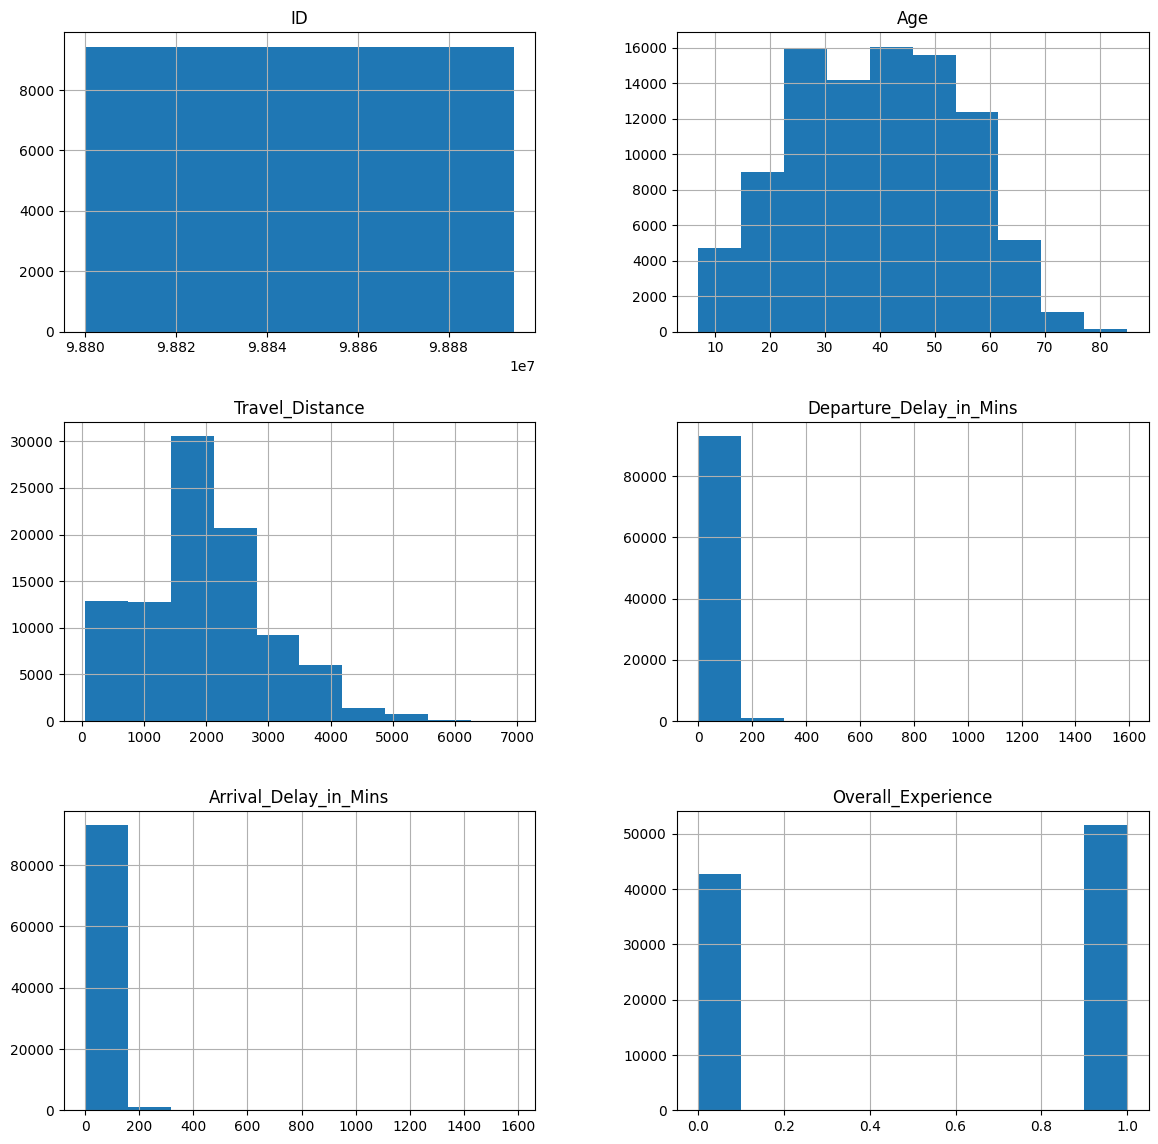

In [ ]:
#Let's see histograms of our numerical data
df_trainImputed[num_cols].hist(figsize=(14,14))
plt.show()

In [ ]:
#Let's compute the % of satisfied travelers in train data set
Satisfied_Travelers = df_trainImputed[df_trainImputed['Overall_Experience']==1]

percentage_satisfied = Satisfied_Travelers.shape[0] / df_trainImputed['ID'].value_counts().shape[0]*100
print("percentage of satisfied travelers", round(percentage_satisfied,2), "percent")

percentage of satisfied travelers 54.67 percent


In [ ]:
# Let's explore the categorical variables
for i in cat_cols:
    print(df_trainImputed[i].value_counts(normalize=True))
    print('*'*50)

Gender
2.000000    0.506733
1.000000    0.492673
1.333333    0.000339
1.666667    0.000254
Name: proportion, dtype: float64
**************************************************
Customer_Type
2.000000    0.793672
1.000000    0.166499
1.666667    0.029721
1.333333    0.010108
Name: proportion, dtype: float64
**************************************************
Type_Travel
1.000000    0.654701
2.000000    0.284301
1.333333    0.041789
1.666667    0.019210
Name: proportion, dtype: float64
**************************************************
Travel_Class
1.0    0.522807
2.0    0.477193
Name: proportion, dtype: float64
**************************************************
Seat_Comfort
4.000000    0.224287
3.000000    0.222020
5.000000    0.218237
2.000000    0.160904
6.000000    0.137435
1.000000    0.036692
3.333333    0.000117
4.333333    0.000117
2.666667    0.000064
4.666667    0.000032
5.666667    0.000032
3.666667    0.000032
5.333333    0.000021
1.666667    0.000011
Name: proportion, dtype: fl

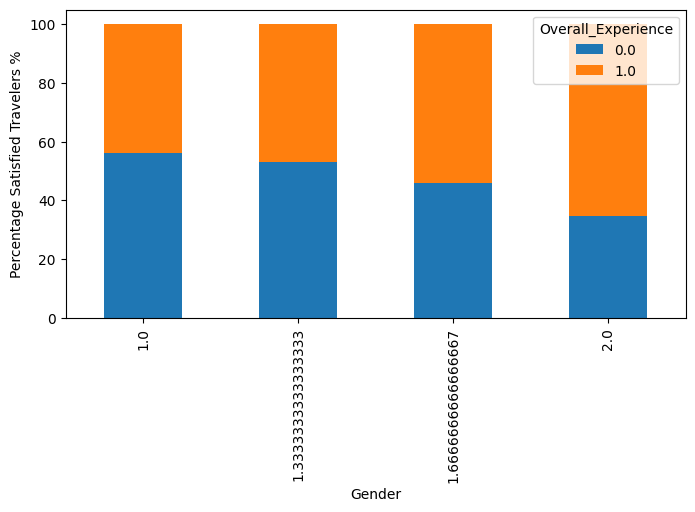

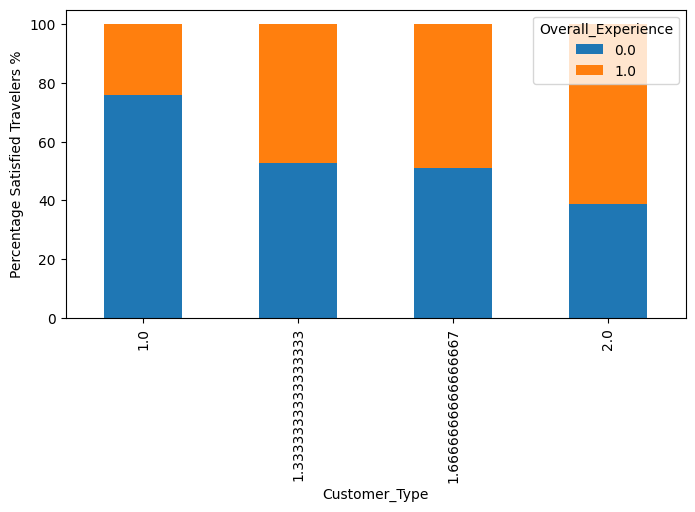

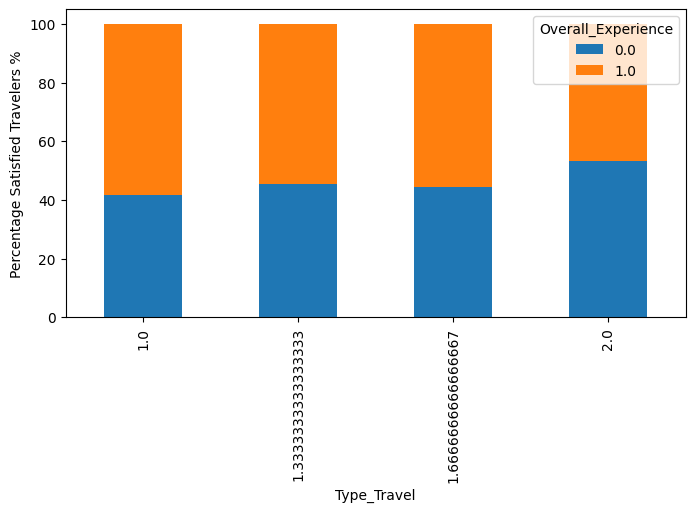

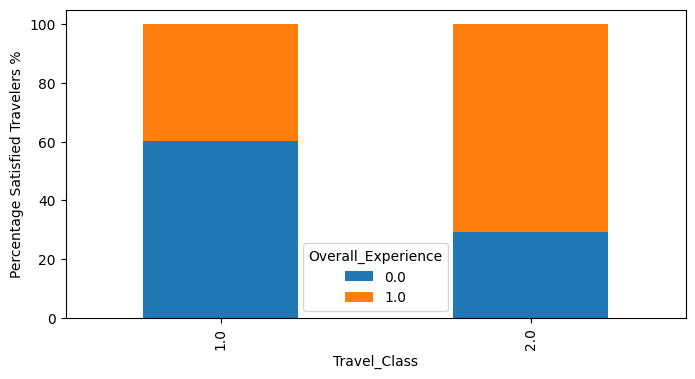

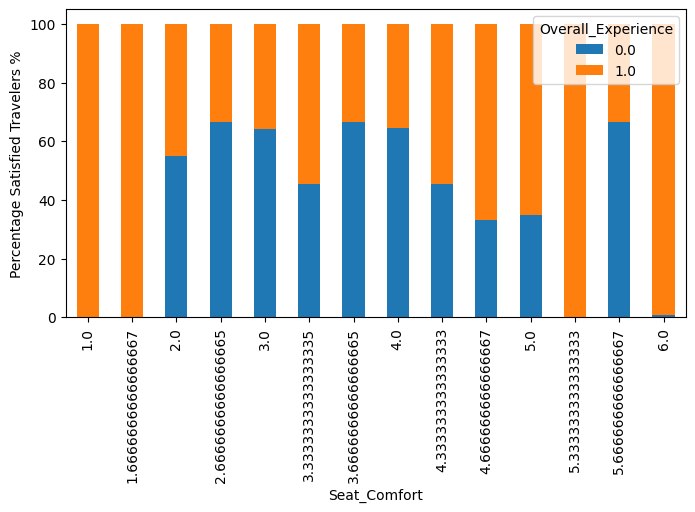

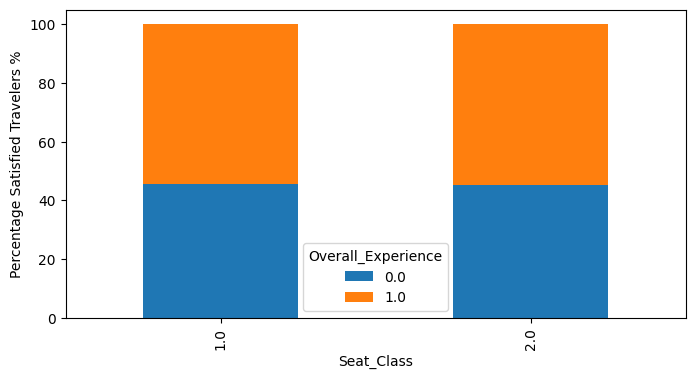

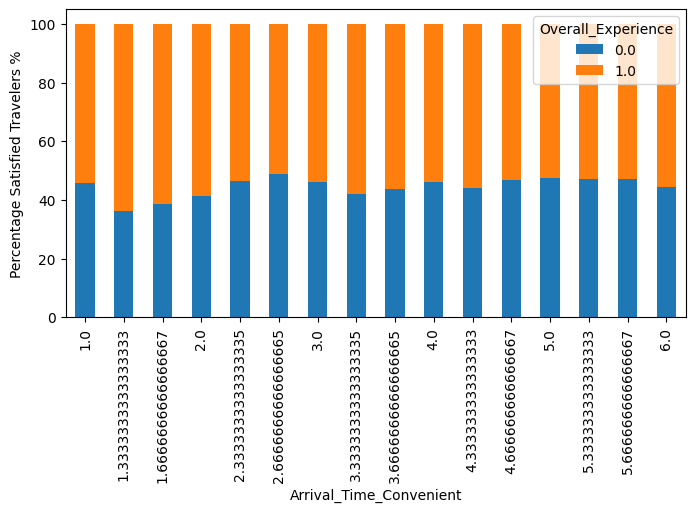

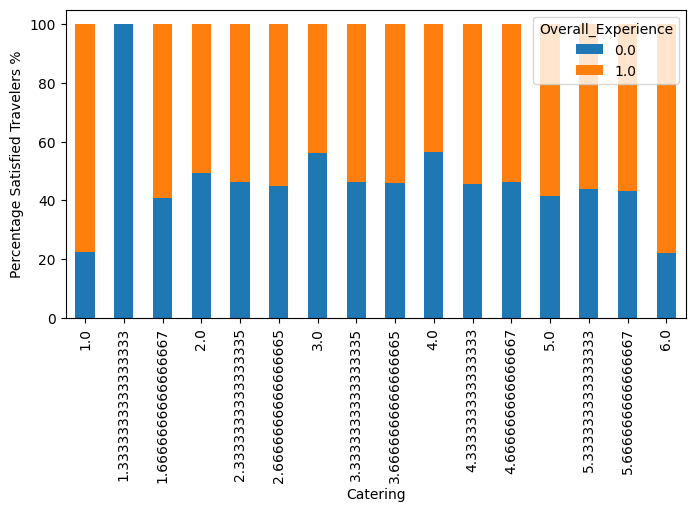

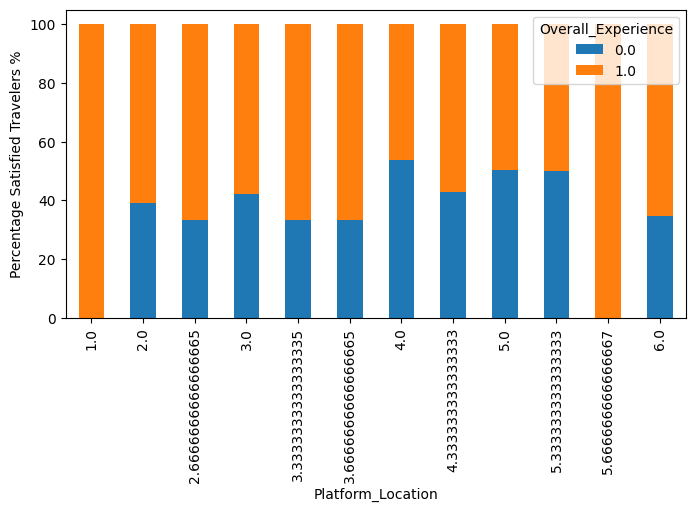

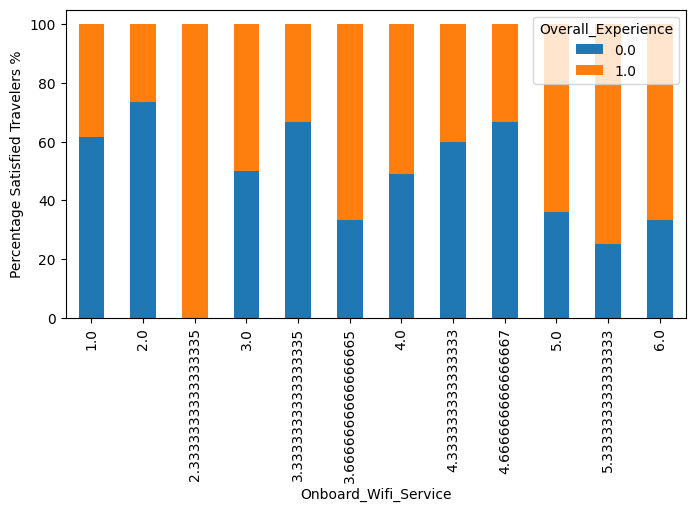

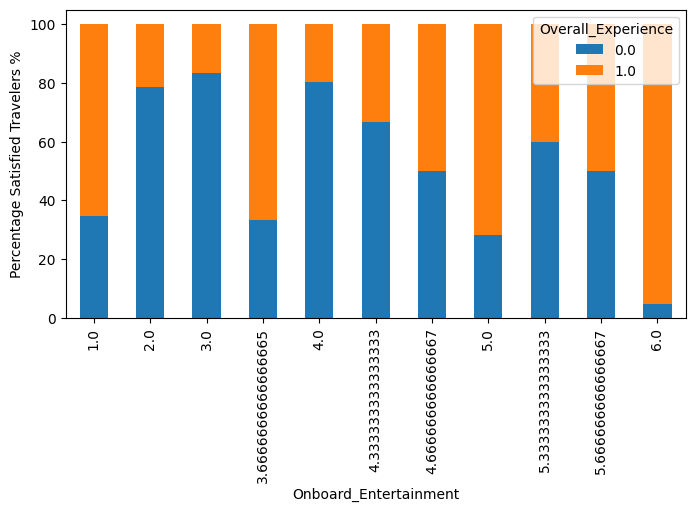

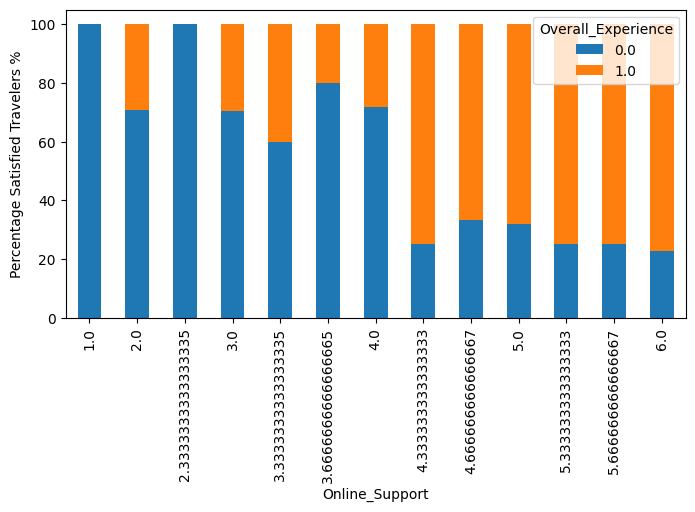

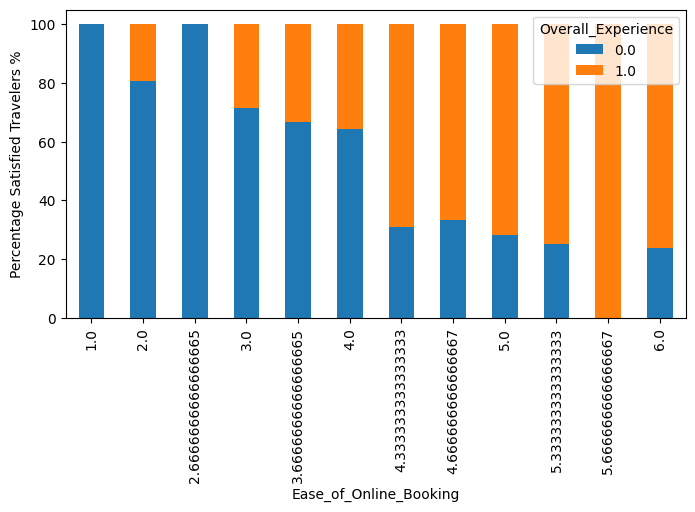

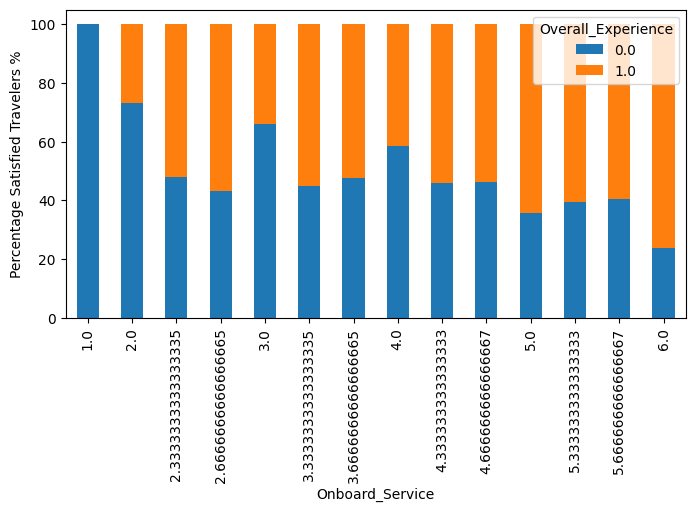

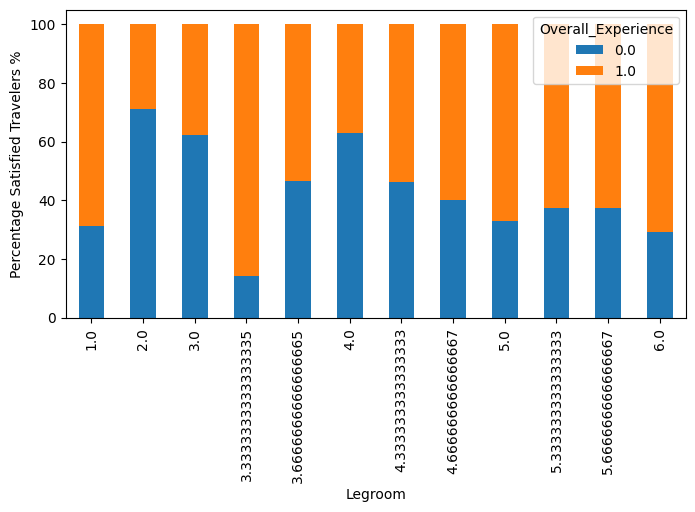

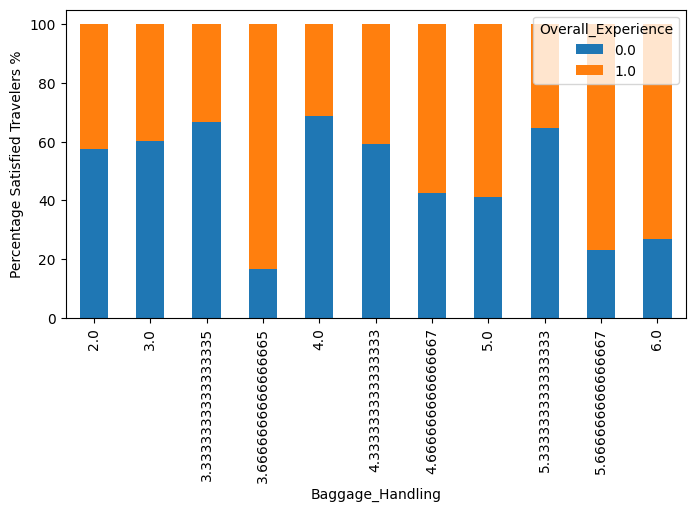

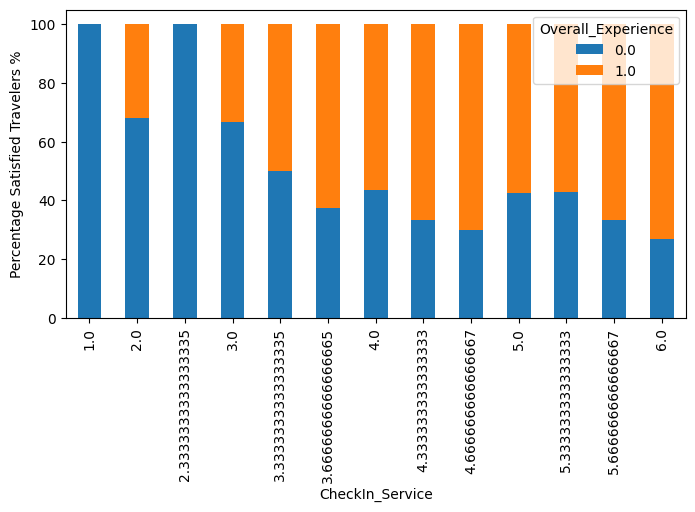

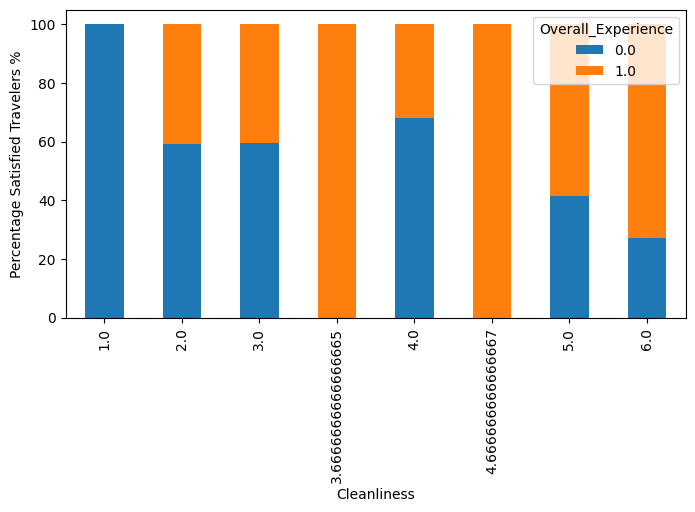

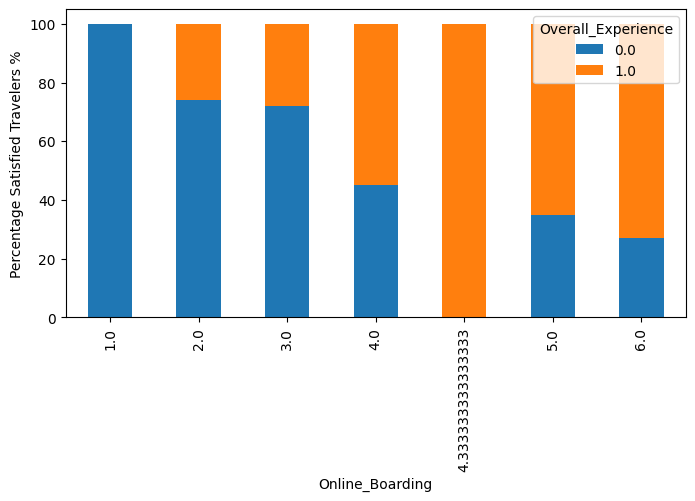

In [ ]:
#Let's see how satisfaction outcome can be impacted doing a bivariate analysis
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df_trainImputed[i],df_trainImputed['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Satisfied Travelers %')

<Axes: >

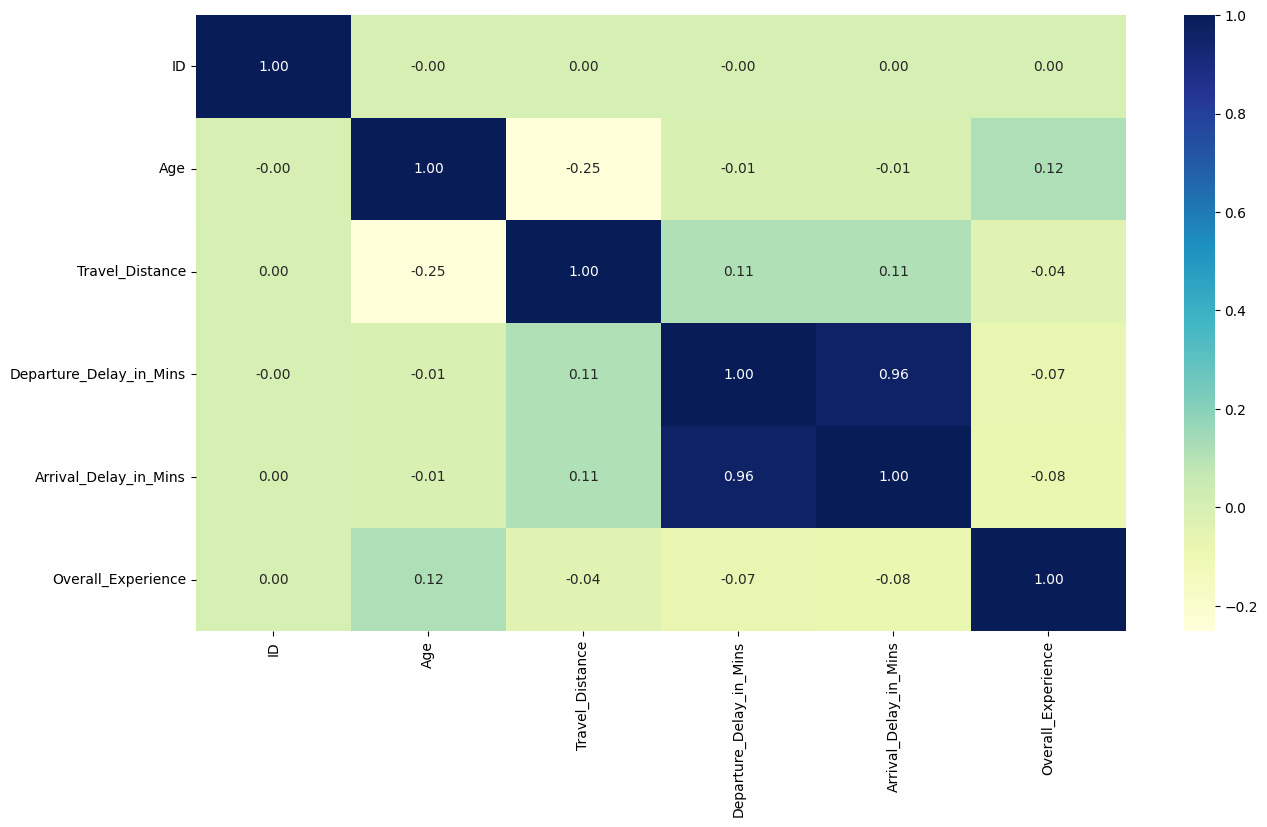

In [ ]:
#Heatmap to see how all numerical variables are correlated
plt.figure(figsize=(15,8))
sns.heatmap(df_trainImputed[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

##Imputation for test data

In [ ]:
df_test_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_test_mergeddata.head(8)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
5,99900006,Male,Loyal Customer,49.0,Business Travel,Business,382,89.0,72.0,Poor,Green Car,NaN,Poor,Inconvenient,Good,Good,Good,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good
6,99900007,Male,Disloyal Customer,40.0,Business Travel,Business,1761,0.0,0.0,Acceptable,Ordinary,Acceptable,Acceptable,Inconvenient,Excellent,Acceptable,Excellent,Excellent,Acceptable,Acceptable,Good,Acceptable,Excellent,Excellent
7,99900008,Female,Loyal Customer,11.0,Personal Travel,Eco,3989,0.0,9.0,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Poor,Excellent,Good,Good,Good,Good,Excellent,Good,Excellent


In [ ]:
#Map new categorical enconded values Train Data:
df_test_mergeddata['Gender']=df_test_mergeddata.Gender.map(dict_Gender)
df_test_mergeddata['Customer_Type']=df_test_mergeddata.Customer_Type.map(dict_CustomerType)
df_test_mergeddata['Type_Travel']=df_test_mergeddata.Type_Travel.map(dict_TypeTravel)
df_test_mergeddata['Travel_Class']=df_test_mergeddata.Travel_Class.map(dict_TravelClass)
df_test_mergeddata['Seat_Comfort']=df_test_mergeddata.Seat_Comfort.map(dict_SeatComfort)
df_test_mergeddata['Seat_Class']=df_test_mergeddata.Seat_Class.map(dict_SeatClass)
df_test_mergeddata['Arrival_Time_Convenient']=df_test_mergeddata.Arrival_Time_Convenient.map(dict_ArrivalTimeConvenient)
df_test_mergeddata['Catering']=df_test_mergeddata.Catering.map(dict_Catering)
df_test_mergeddata['Platform_Location']=df_test_mergeddata.Platform_Location.map(dict_PlatformLocation)
df_test_mergeddata['Onboard_Wifi_Service']=df_test_mergeddata.Onboard_Wifi_Service.map(dict_OnboardWifi)
df_test_mergeddata['Onboard_Entertainment']=df_test_mergeddata.Onboard_Entertainment.map(dict_OnboardEnt)
df_test_mergeddata['Online_Support']=df_test_mergeddata.Online_Support.map(dict_OnlineSupport)
df_test_mergeddata['Ease_of_Online_Booking']=df_test_mergeddata.Ease_of_Online_Booking.map(dict_EaseOfOnlineBooking)
df_test_mergeddata['Onboard_Service']=df_test_mergeddata.Onboard_Service.map(dict_OnboardService)
df_test_mergeddata['Legroom']=df_test_mergeddata.Legroom.map(dict_Legroom)
df_test_mergeddata['Baggage_Handling']=df_test_mergeddata.Baggage_Handling.map(dict_BaggageHandling)
df_test_mergeddata['CheckIn_Service']=df_test_mergeddata.CheckIn_Service.map(dict_CheckInService)
df_test_mergeddata['Cleanliness']=df_test_mergeddata.Cleanliness.map(dict_Cleanliness)
df_test_mergeddata['Online_Boarding']=df_test_mergeddata.Online_Boarding.map(dict_OnlineBoarding)
#df_train_mergeddata['AgeRange']=df_train_mergeddata.AgeRange.map(dict_AgeRange)
#df_train_mergeddata['DistRange']=df_train_mergeddata.DistRange.map(dict_Distance)
#df_train_mergeddata['DepartureDelayMins']=df_train_mergeddata.DepartureDelayMins.map(dict_DelayMins)
#df_train_mergeddata['ArrivalDelayMins']=df_train_mergeddata.ArrivalDelayMins.map(dict_DelayMins)

In [ ]:
df_test_mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  float64
 2   Customer_Type            32219 non-null  float64
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  float64
 5   Travel_Class             35602 non-null  int64  
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  float64
 10  Seat_Class               35602 non-null  int64  
 11  Arrival_Time_Convenient  32277 non-null  float64
 12  Catering                 32245 non-null  float64
 13  Platform_Location        35590 non-null  float64
 14  Onboard_Wifi_Service  

In [ ]:
# Impute missing values using k-nearest neighbor imputation
imputer = KNNImputer(n_neighbors=3)
df_testImpt = imputer.fit_transform(df_test_mergeddata)

# Convert the imputed values back to a Pandas DataFrame
df_testImputed = pd.DataFrame(df_testImpt, columns=df_test_mergeddata.columns)

In [ ]:
df_testImputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  float64
 1   Gender                   35602 non-null  float64
 2   Customer_Type            35602 non-null  float64
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  float64
 5   Travel_Class             35602 non-null  float64
 6   Travel_Distance          35602 non-null  float64
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  float64
 10  Seat_Class               35602 non-null  float64
 11  Arrival_Time_Convenient  35602 non-null  float64
 12  Catering                 35602 non-null  float64
 13  Platform_Location        35602 non-null  float64
 14  Onboard_Wifi_Service  

In [ ]:
df_testImputed.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001.0,2.0,2.0,36.0,1.0,2.0,532.0,0.0,0.0,4.0,2.0,4.0,4.0,4.0,3.0,6.0,5.0,6.0,6.000000,6.0,6.0,5.0,6.0,2.0
1,99900002.0,2.0,1.0,21.0,1.0,2.0,1425.0,9.0,28.0,1.0,1.0,5.0,2.0,4.0,4.0,2.0,4.0,4.0,6.000000,4.0,5.0,4.0,6.0,4.0
2,99900003.0,1.0,2.0,60.0,1.0,2.0,2832.0,0.0,0.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.000000,3.0,3.0,5.0,3.0,6.0
3,99900004.0,2.0,2.0,29.0,2.0,1.0,1352.0,0.0,0.0,4.0,2.0,6.0,4.0,6.0,2.0,4.0,6.0,2.0,4.000000,3.0,6.0,6.0,6.0,2.0
4,99900005.0,1.0,1.0,18.0,1.0,2.0,1610.0,17.0,0.0,6.0,1.0,1.0,6.0,3.0,6.0,6.0,6.0,6.0,4.666667,4.0,6.0,6.0,6.0,6.0


In [ ]:
df_testImputed.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35602.0,1.508005e+00,0.499793,1.0,1.00,2.0,2.00,2.0
Customer_Type,35602.0,1.817604e+00,0.374541,1.0,2.00,2.0,2.00,2.0
Age,35602.0,3.944740e+01,15.135560,7.0,27.00,40.0,51.00,85.0
Type_Travel,35602.0,1.305217e+00,0.446130,1.0,1.00,1.0,2.00,2.0
Travel_Class,35602.0,1.481125e+00,0.499651,1.0,1.00,1.0,2.00,2.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35602.0,1.488172e+01,37.883691,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35602.0,1.531233e+01,38.483322,0.0,0.00,0.0,13.00,970.0
Seat_Comfort,35602.0,3.836704e+00,1.393165,1.0,3.00,4.0,5.00,6.0


PREPARE DATA BY SEPARATING INDEPENDANT TARGET DATA FROM FEATURES

In [ ]:
#Separate Target value from dependent features in both defined Train & Test Data
X_fortrain = df_trainImputed.drop(columns='Overall_Experience')  # Features for training set
Y_fortrain = df_trainImputed['Overall_Experience']

In [ ]:
x_test = df_testImputed  # Features for test set
#y_test = df_testImputed['Overall_Experience']

#x_test = df_testImputed.drop(columns='Overall_Experience')  # Features for test set
#y_test = df_testImputed['Overall_Experience']

In [ ]:
x_train, x_pretest, y_train, y_pretest = train_test_split(X_fortrain, Y_fortrain, test_size = 0.2, shuffle = True, random_state = 1)

# Model evaluation criterion

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not', 'Yes'], yticklabels=['Not', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building a Decision Tree model**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state = 1)

In [ ]:
dt_classifier.fit(x_train, y_train)
dtclassifiervariable = dt_classifier.fit(x_train, y_train)
print('The depth of the tree is:',dtclassifiervariable.tree_.max_depth)

The depth of the tree is: 33


Now, we evaluate the model on the train set and on the test set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34224
         1.0       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



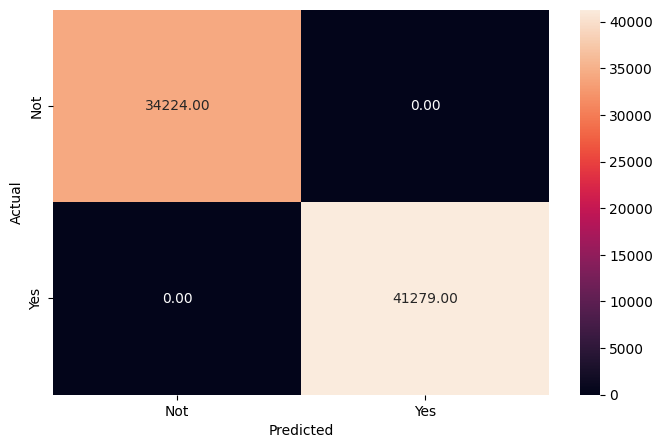

In [ ]:
# Model Performance on the train data
y_pred_train_dt = dt_classifier.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      8562
         1.0       0.93      0.93      0.93     10314

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



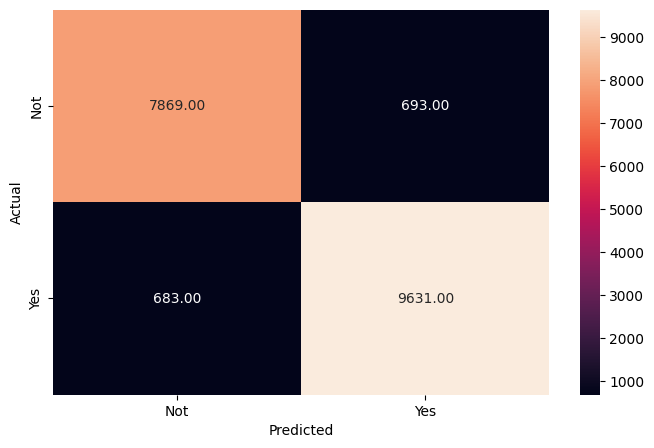

In [ ]:
# Model Performance on the test data
y_pred_test_dt = dt_classifier.predict(x_pretest)
metrics_score(y_pretest, y_pred_test_dt)

## Building a Random Forest model

In [ ]:
# Random Forest Regressor
rf_regressor = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

Metrics of random forest on train data:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34224
         1.0       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



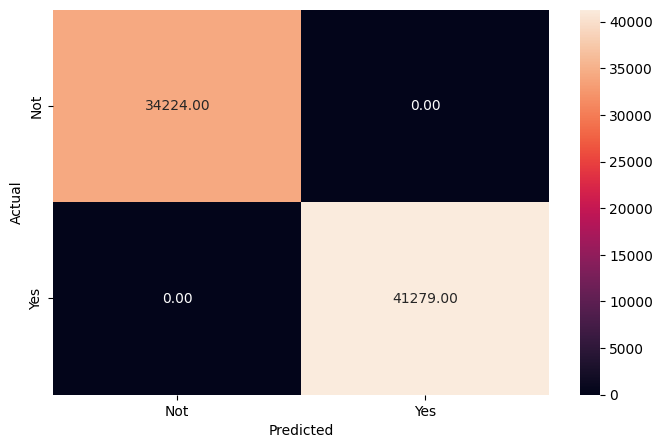

In [ ]:
y_pred_train_rf = rf_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      8562
         1.0       0.96      0.95      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



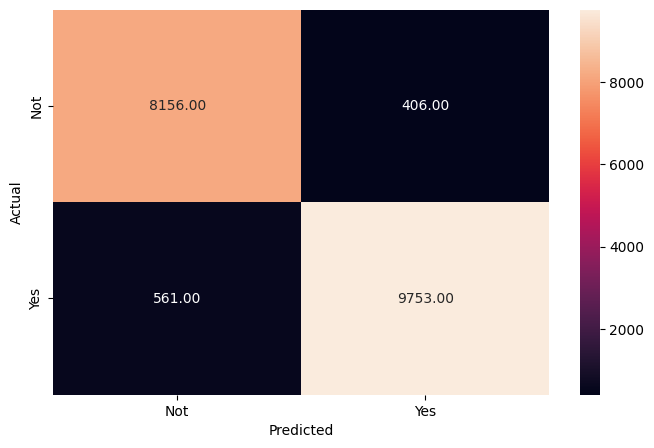

In [ ]:
# Checking performance of the Random forest on the testing data
y_pred_test_rf = rf_regressor.predict(x_pretest)
metrics_score(y_pretest, y_pred_test_rf)

#Now, we make a hand-definition of parameters of random forest:

In [ ]:
# Random Forest Regressor
rf_regressor_hand = RandomForestClassifier(n_estimators = 100, max_depth=7, max_features=0.8, random_state = 1)

# Fitting the model
rf_regressor_hand.fit(x_train, y_train)
###y_pred_train_rf_hand = rf_regressor_hand.predict(x_train)

#{"n_estimators": [100, 110, 120],
#    "max_depth": [5, 7, 15, 20, 30, 50],
#    "max_features": [0.8, 1, 2]

RandomForestClassifier(max_depth=7, max_features=0.8, random_state=1)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     34224
         1.0       0.93      0.93      0.93     41279

    accuracy                           0.92     75503
   macro avg       0.92      0.92      0.92     75503
weighted avg       0.92      0.92      0.92     75503



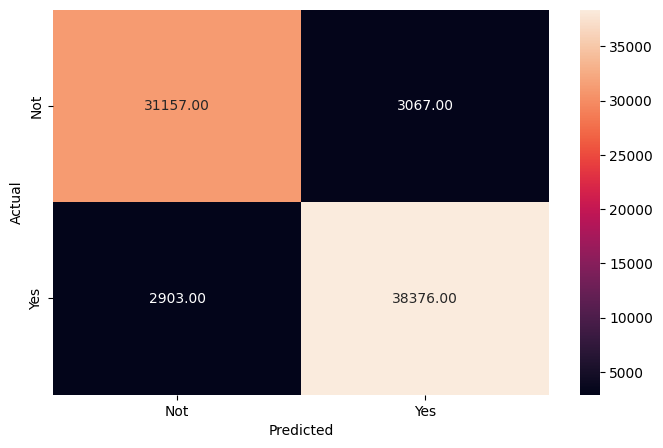

In [ ]:
y_pred_train_rf_hand = rf_regressor_hand.predict(x_train)
metrics_score(y_train, y_pred_train_rf_hand)

Now, we prove the hand-RandomForest on the test data:

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      8562
         1.0       0.92      0.93      0.92     10314

    accuracy                           0.92     18876
   macro avg       0.92      0.92      0.92     18876
weighted avg       0.92      0.92      0.92     18876



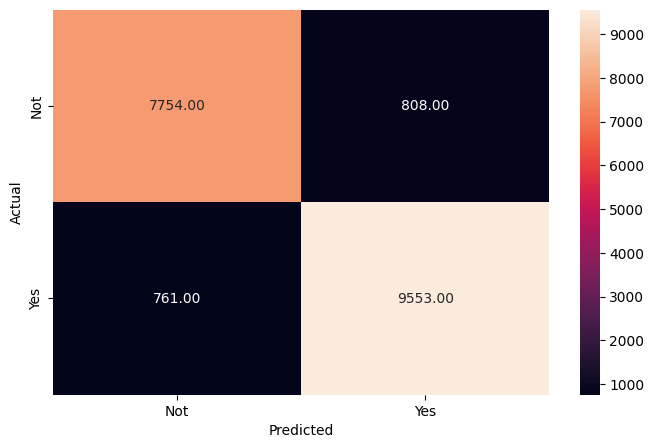

In [ ]:
y_pred_test_rf_hand = rf_regressor_hand.predict(x_pretest)
metrics_score(y_pretest, y_pred_test_rf_hand)

#Performance on the testing data (testing data whose output is unknown), in order to deliver the requested output prediction

In [ ]:
y_pred_test_rf_todeliver = rf_regressor.predict(x_test)

In [ ]:
y_pred_test_rf_todeliver.shape

(35602,)

The predicted values, for the testing data whose output is unknown;  in order to deliver the requested output prediction, are:

In [ ]:
print('The predicted values, for the testing data whose output is unknown; in order to deliver the requested output prediction, are:', y_pred_test_rf_todeliver)

The predicted values, for the testing data whose output is unknown; in order to deliver the requested output prediction, are: [1. 1. 1. ... 1. 1. 0.]


In [ ]:
print(y_pred_test_rf_todeliver)

[1. 1. 1. ... 1. 1. 0.]


In [ ]:
df_test_todeliver = pd.DataFrame()
#df_test_todeliver = []
df_test_todeliver['ID'] = df_testImputed['ID']
df_test_todeliver['Overall_Experience'] = y_pred_test_rf_todeliver

df_test_todeliver.info()



#df_test_todeliver.to_csv('Submission.csv', sep=',', index=False, encoding='utf-8')

df_test_todeliver.to_csv('Submission2.csv', index=False)


#Submission_ = df_test_todeliver.to_csv()
#df.to_csv('Biodata.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  35602 non-null  float64
 1   Overall_Experience  35602 non-null  float64
dtypes: float64(2)
memory usage: 556.4 KB


In [ ]:
df_test_todeliver.head()

,ID,Overall_Experience
0,99900001.0,1.0
1,99900002.0,1.0
2,99900003.0,1.0
3,99900004.0,0.0
4,99900005.0,1.0


### **Tuned Random Forest Regressor**

In [ ]:
rf_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, 15, 20, 30, 50],

    "max_features": [0.8, 1, 2]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features=0.8, n_estimators=120,
                       random_state=1)

Metrics of tuned random forest on training data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34224
         1.0       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



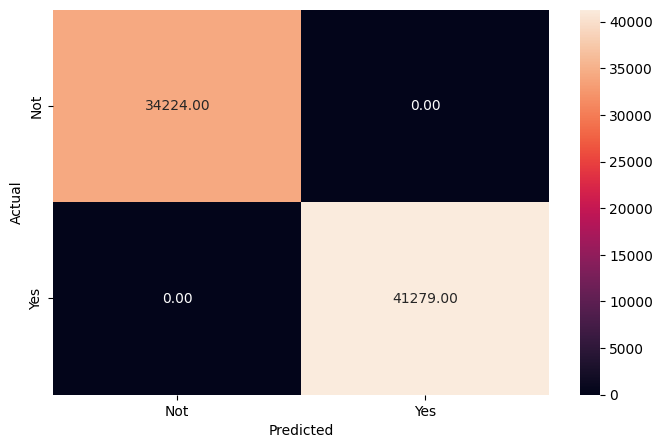

In [ ]:
# Model Performance on the train data
y_pred_train_rf_tuned = rf_tuned_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

Metrics of tuned random forest on test data

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8562
         1.0       0.96      0.95      0.96     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



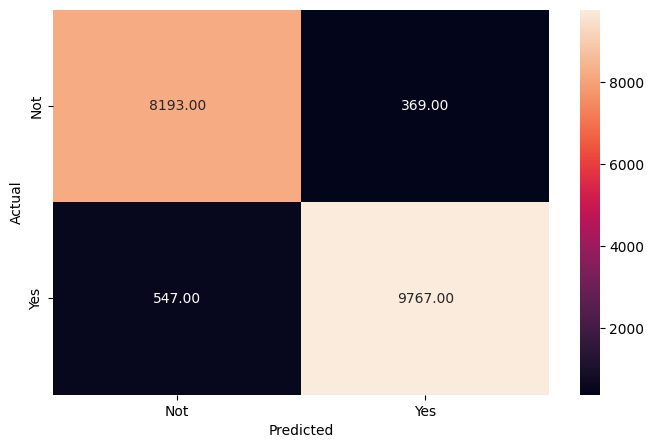

In [ ]:
# Model Performance on the test data
y_pred_test_rf_tuned = rf_tuned_regressor.predict(x_pretest)
metrics_score(y_pretest, y_pred_test_rf_tuned)

Application of the random forest to the dat (x_test)a, in order to deliver the final predicted values